HEART DISEASE PREDICTION (USING ML) BY AMRIT BEHERA

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Load the Dataset

In [2]:
val=pd.read_csv(r"D:\bckup file\Downloads\heart.csv")

In [3]:
val

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
val.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
val.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
val.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
val['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [9]:
val['chol'].value_counts()

204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64

In [10]:
val['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [11]:
val.shape

(1025, 14)

In [12]:
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

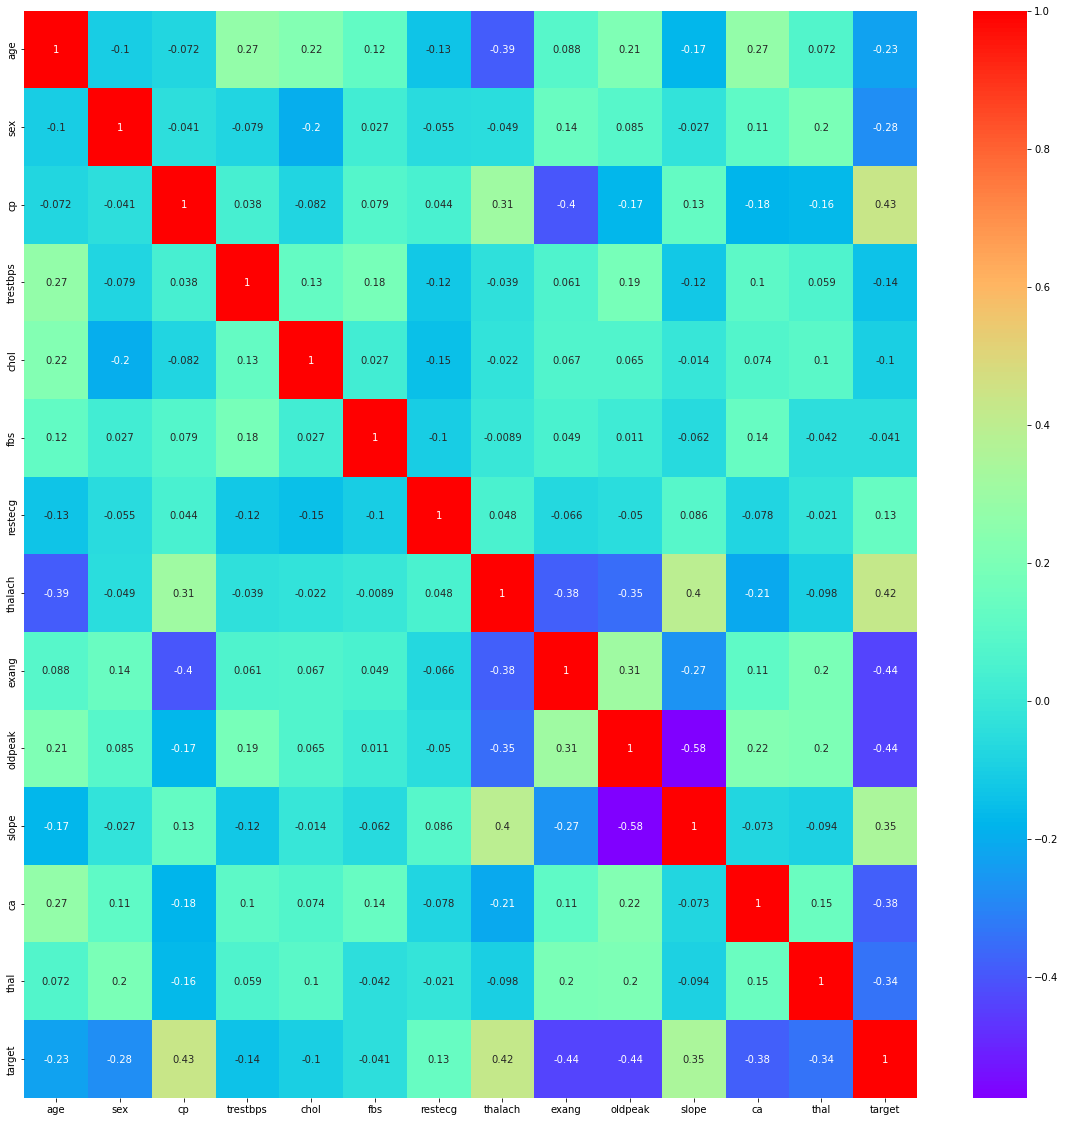

In [15]:
corrmat=val.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
a=sns.heatmap(val[top_corr_features].corr(),annot=True,cmap="rainbow")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

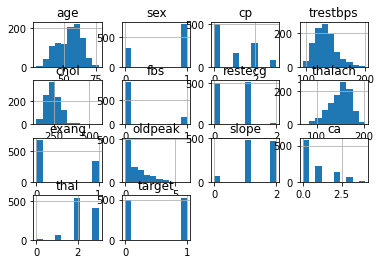

In [16]:
val.hist()

# Balanced Dataset

<AxesSubplot:xlabel='target', ylabel='count'>

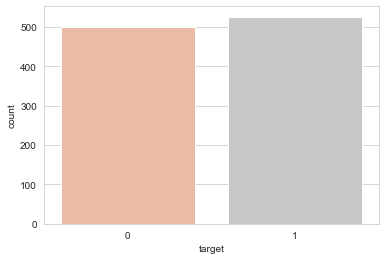

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=val,palette='RdGy')

As it looks quite a balanced dataset now we will be doing Pre Processing of the data

Before training the machine learning models we need to convert the categorical variables into dummy variables

# Dummies using pandas to convert categorical value

In [18]:
val=pd.get_dummies(val,columns=['cp','restecg'])

In [19]:
val

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,2,3,0,1,0,0,0,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,3,0,1,0,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,3,0,1,0,0,0,0,1,0
3,61,1,148,203,0,161,0,0.0,2,1,3,0,1,0,0,0,0,1,0
4,62,0,138,294,1,106,0,1.9,1,3,2,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0,2,1,0,1,0,0,0,1,0
1021,60,1,125,258,0,141,1,2.8,1,1,3,0,1,0,0,0,1,0,0
1022,47,1,110,275,0,118,1,1.0,1,1,2,0,1,0,0,0,1,0,0
1023,50,0,110,254,0,159,0,0.0,2,0,2,1,1,0,0,0,1,0,0


In [20]:
standardScaler=StandardScaler()

columns_to_scale=['cp_0', 'cp_1', 'cp_2', 'cp_3','restecg_0','restecg_1', 'restecg_2']
val[columns_to_scale]=standardScaler.fit_transform(val[columns_to_scale])

In [21]:
val

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,2,3,0,1.030715,-0.441179,-0.619085,-0.284998,-0.970200,0.999025,-0.121867
1,53,1,140,203,1,155,1,3.1,0,0,3,0,1.030715,-0.441179,-0.619085,-0.284998,1.030715,-1.000976,-0.121867
2,70,1,145,174,0,125,1,2.6,0,0,3,0,1.030715,-0.441179,-0.619085,-0.284998,-0.970200,0.999025,-0.121867
3,61,1,148,203,0,161,0,0.0,2,1,3,0,1.030715,-0.441179,-0.619085,-0.284998,-0.970200,0.999025,-0.121867
4,62,0,138,294,1,106,0,1.9,1,3,2,0,1.030715,-0.441179,-0.619085,-0.284998,-0.970200,0.999025,-0.121867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0,2,1,-0.970200,2.266655,-0.619085,-0.284998,-0.970200,0.999025,-0.121867
1021,60,1,125,258,0,141,1,2.8,1,1,3,0,1.030715,-0.441179,-0.619085,-0.284998,1.030715,-1.000976,-0.121867
1022,47,1,110,275,0,118,1,1.0,1,1,2,0,1.030715,-0.441179,-0.619085,-0.284998,1.030715,-1.000976,-0.121867
1023,50,0,110,254,0,159,0,0.0,2,0,2,1,1.030715,-0.441179,-0.619085,-0.284998,1.030715,-1.000976,-0.121867


In [22]:
numerical_cols=['age','trestbps','chol','thalach','oldpeak']
cat_cols=list(set(val.columns)-set(numerical_cols)-{'target'})

In [23]:
val['oldpeak'].value_counts()

0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: oldpeak, dtype: int64

In [22]:
cat_cols

['restecg_0',
 'cp_0',
 'ca',
 'exang',
 'restecg_1',
 'sex',
 'cp_3',
 'thal',
 'cp_2',
 'cp_1',
 'fbs',
 'restecg_2',
 'slope']

# Spliting the Data

In [24]:
val_train,val_test=train_test_split(val,test_size=0.2,random_state=42)

In [25]:
len(val_train), len(val_test)

(820, 205)

In [29]:
scaler=StandardScaler()
def get_features_and_target_arrays(val,numerical_cols,cat_cols,scaler):
    x_numerical_scaled=scaler.fit_transform(val[numerical_cols])   #for numeric column
    x_categorical=val[cat_cols].to_numpy()   #for categorical column
    x=np.hstack((x_categorical,x_numerical_scaled))
    y=val['target']
    return x,y

In [30]:
x_train,y_train=get_features_and_target_arrays(val_train,numerical_cols,cat_cols,scaler)

# Logistic Regression

In [32]:
xyz=LogisticRegression()
xyz.fit(x_train,y_train)

LogisticRegression()

In [33]:
x_test,y_test=get_features_and_target_arrays(val_test,numerical_cols,cat_cols,scaler)

In [34]:
test_pred=xyz.predict(x_test)

In [35]:
mean_squared_error(y_test,test_pred)

0.2048780487804878

In [36]:
accuracy_score(y_test,test_pred)

0.7951219512195122

In [37]:
confusion_matrix(y_test,test_pred)

array([[70, 32],
       [10, 93]], dtype=int64)

# Decision Tree Classifier

In [38]:
dc_xyz=DecisionTreeClassifier()
dc_xyz.fit(x_train,y_train)
dc_pred=dc_xyz.predict(x_test)
print(mean_squared_error(y_test,dc_pred))
print(accuracy_score(y_test,dc_pred))

0.04390243902439024
0.9560975609756097


In [39]:
confusion_matrix(y_test,dc_pred)

array([[97,  5],
       [ 4, 99]], dtype=int64)

# Random Forest Classifier

In [40]:
rc_xyz=RandomForestClassifier()
rc_xyz.fit(x_train,y_train)
rc_pred=rc_xyz.predict(x_test)
print(mean_squared_error(y_test,rc_pred))
print(accuracy_score(y_test,rc_pred))

0.014634146341463415
0.9853658536585366


In [41]:
confusion_matrix(y_test,rc_pred)

array([[102,   0],
       [  3, 100]], dtype=int64)

# Support Vector Machine

In [42]:
svc_xyz=SVC()
svc_xyz.fit(x_train,y_train)
svc_pred=svc_xyz.predict(x_test)
print(mean_squared_error(y_test,svc_pred))
print(accuracy_score(y_test,svc_pred))

0.16585365853658537
0.8341463414634146


In [43]:
confusion_matrix(y_test,svc_pred)

array([[75, 27],
       [ 7, 96]], dtype=int64)

Here we conclude that RandomForestClassifier has the most accurate score and error

# THANK YOU